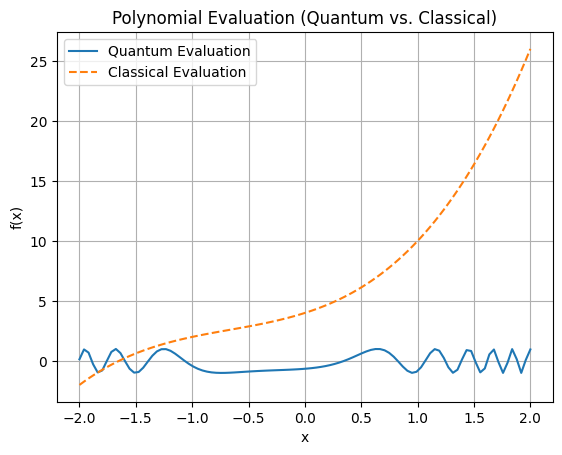

In [2]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np

# Define the coefficients of the polynomial ax^3 + bx^2 + cx + d
a = 1
b = 2
c = 3
d = 4

# Define the polynomial as a PennyLane function
def polynomial(x):
    return a * x**3 + b * x**2 + c * x + d

# Create a quantum device
dev = qml.device("default.qubit", wires=1)

# Define a quantum circuit to encode and evaluate the polynomial
@qml.qnode(dev)
def quantum_polynomial(x):
    qml.RY(a * x, wires=0)
    qml.RY(b * x**2, wires=0)
    qml.RY(c * x**3, wires=0)
    qml.RY(d, wires=0)
    return qml.expval(qml.PauliZ(0))

# Define the range of x values for plotting
x_values = np.linspace(-2, 2, 100)
y_quantum = [quantum_polynomial(x) for x in x_values]
y_classical = [polynomial(x) for x in x_values]

# Plot both the quantum and classical evaluations
plt.figure()
plt.plot(x_values, y_quantum, label='Quantum Evaluation')
plt.plot(x_values, y_classical, label='Classical Evaluation', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Polynomial Evaluation (Quantum vs. Classical)')
plt.grid()
plt.show()
